In [1]:
# Notes - cluster visualisation using kmeans clustering
# Evaluation? Using ground truth labels?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans

path = 'ace_sis_low_2595-3.txt'
data = []
hist = []
with open(path, 'r') as file:
    for line in file:
        parts = line.split()
        if len(parts) == 3:
            if hist:
                data.append(hist)
            hist = [int(x) for x in parts]
        else:
            hist.extend(map(int, parts))
if hist:
    data.append(hist)

cols = ['year', 'day', 'hour'] + [f'bin_{i+1}' for i in range(60)]
df = pd.DataFrame(data, columns=cols)
# Using Values from professor
he3_start = int((2.7 - 2) / 0.05)
he3_end = int((3.3 - 2) / 0.05)
he4_start = int((3.7 - 2) / 0.05)
he4_end = int((4.3 - 2) / 0.05)

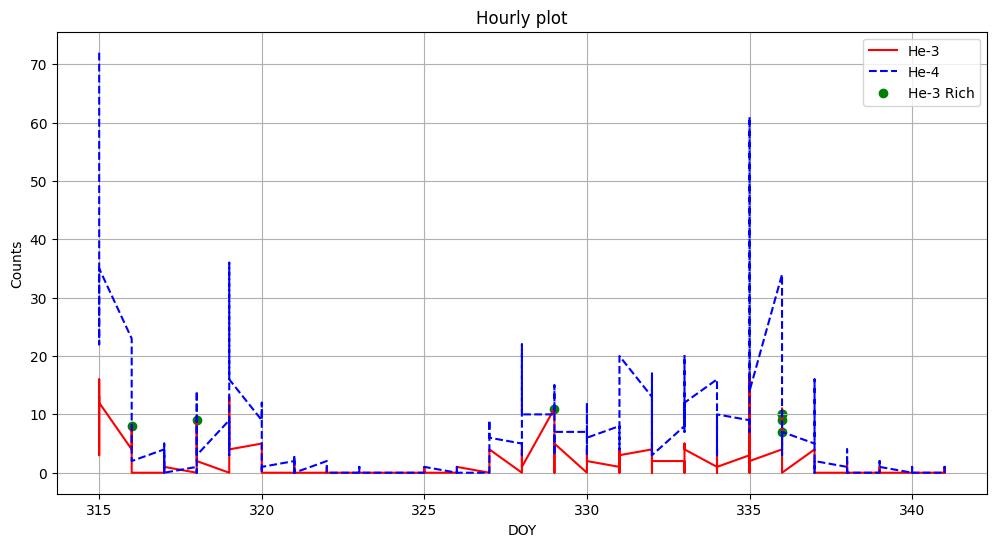

In [2]:
filtered = df[(df['day'] >= 315) & (df['day'] <= 341)]
filtered['He-3'] = filtered.iloc[:, 3+he3_start:3+he3_end+1].sum(axis=1)
filtered['He-4'] = filtered.iloc[:, 3+he4_start:3+he4_end+1].sum(axis=1)
filtered['He-3 Rich'] = (filtered['He-3'] >= 0.5 * filtered['He-4']) & ((filtered['He-3'] + filtered['He-4']) >= 20)
# Working with hourly plot instead of daily
plt.figure(figsize=(12, 6))
plt.plot(filtered['day'], filtered['He-3'], label='He-3', color='red')
plt.plot(filtered['day'], filtered['He-4'], label='He-4', color='blue', linestyle='--')
plt.scatter(filtered['day'][filtered['He-3 Rich']], filtered['He-3'][filtered['He-3 Rich']], color='green', marker='o', label='He-3 Rich')
plt.title('Hourly plot')
plt.xlabel('DOY')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
filtered['He-3 Rich'] = ((filtered['He-3'] >= 0.5 * filtered['He-4']) & ((filtered['He-3'] + filtered['He-4']) >= 20)).astype(int)
X = filtered[['He-3', 'He-4']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
filtered['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


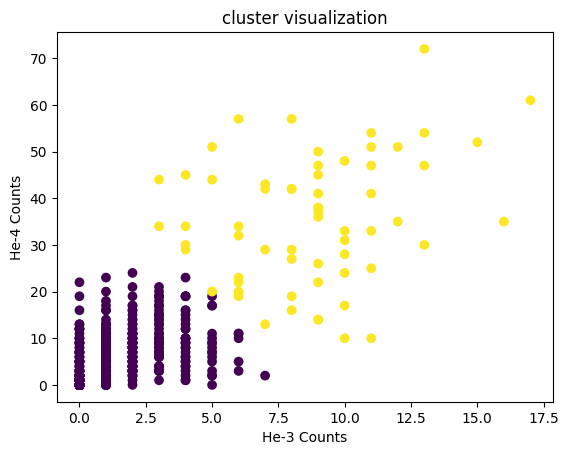

In [18]:
plt.scatter(filtered['He-3'], filtered['He-4'], c=filtered['Cluster'], cmap='viridis', marker='o')
plt.title('cluster visualization')
plt.xlabel('He-3 Counts')
plt.ylabel('He-4 Counts')
plt.show()
